In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

# time属性暂时其实用不到

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Frequency')

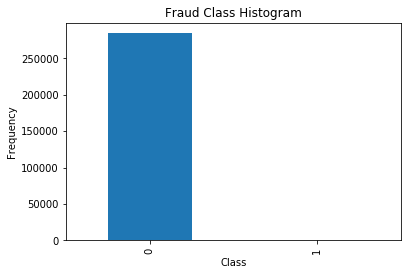

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
# 应对样本不均衡的办法：下采样与过采样
# 下采样：使得两个样本同样少
# 过采样：使得两个样本同样多

In [5]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
# 对X和Y进行切分
X = data.ix[:,data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# 拿到索引后进行定位操作
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

print("Percentage of normal transactions:", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions:", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Percentage of fraud transactions:", len(under_sample_data))

/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Percentage of fraud transactions: 984


/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [7]:
# 交叉验证
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset:", len(X_train))
print("Number transaction test dataset:", len(X_test))
print("Total number of transactions", len(X_train) + len(X_test))

# Understadning dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   , y_undersample
                                                                                                   , test_size=0.3
                                                                                                   , random_state = 0)

print("")
print('Number transactions train dataset:',len(X_train_undersample))
print("Number transaction test dataset:", len(X_test_undersample))
print("Total number of transactions:", len(X_train_undersample) + len(X_test_undersample))

/anaconda2/envs/my_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number transactions train dataset: 199364
Number transaction test dataset: 85443
Total number of transactions 284807

Number transactions train dataset: 688
Number transaction test dataset: 296
Total number of transactions: 984


In [8]:
# recall(查全率/召回率)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [9]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 
    
    # Differenr C parameters
    c_param_range = [0.01, 0.1, 1, 10,100]
    
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall'])
    results_table['C_parameter'] = c_param_range
    
    j = 0                             
    for c_param in c_param_range:
        print('-------------')
        print('C parameter:', c_param)
        print('')
        
        recall_accs = []
        for iteration, indices in enumerate(fold, start=1):
            lr = LogisticRegression(C = c_param, penalty = 'l1')
            
            lr.fit(x_train_data.iloc[indices[0],: ], y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ':recall score =', recall_acc)
            
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score', np.mean(recall_accs))
        print('')
        
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can chech which C parameter is the best amongst the chosen.
    print('**********')
    print('Best model to choose from cross validation is with C parameter =', best_c)
    print('**********')
    
    return best_c
            
            
                                 

In [10]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------
C parameter: 0.01

Iteration 1 :recall score = 0.931506849315
Iteration 2 :recall score = 0.917808219178
Iteration 3 :recall score = 1.0
Iteration 4 :recall score = 0.972972972973
Iteration 5 :recall score = 0.969696969697

Mean recall score 0.958397002233

-------------
C parameter: 0.1

Iteration 1 :recall score = 0.849315068493
Iteration 2 :recall score = 0.86301369863
Iteration 3 :recall score = 0.915254237288
Iteration 4 :recall score = 0.945945945946
Iteration 5 :recall score = 0.893939393939

Mean recall score 0.893493668859

-------------
C parameter: 1

Iteration 1 :recall score = 0.86301369863
Iteration 2 :recall score = 0.890410958904
Iteration 3 :recall score = 0.983050847458
Iteration 4 :recall score = 0.945945945946
Iteration 5 :recall score = 0.909090909091

Mean recall score 0.918302472006

-------------
C parameter: 10

Iteration 1 :recall score = 0.86301369863
Iteration 2 :recall score = 0.890410958904
Iteration 3 :recall score = 0.983050847458
Iteration

/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration 1 :recall score = 0.86301369863
Iteration 2 :recall score = 0.890410958904
Iteration 3 :recall score = 0.983050847458
Iteration 4 :recall score = 0.945945945946
Iteration 5 :recall score = 0.924242424242

Mean recall score 0.921332775036

**********
Best model to choose from cross validation is with C parameter = 0.01
**********


In [11]:
best_c = printing_Kfold_scores(X_train, y_train)

-------------
C parameter: 0.01

Iteration 1 :recall score = 0.492537313433
Iteration 2 :recall score = 0.602739726027
Iteration 3 :recall score = 0.683333333333
Iteration 4 :recall score = 0.569230769231
Iteration 5 :recall score = 0.45

Mean recall score 0.559568228405

-------------
C parameter: 0.1



/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration 1 :recall score = 0.567164179104
Iteration 2 :recall score = 0.616438356164
Iteration 3 :recall score = 0.683333333333
Iteration 4 :recall score = 0.584615384615
Iteration 5 :recall score = 0.525

Mean recall score 0.595310250644

-------------
C parameter: 1

Iteration 1 :recall score = 0.55223880597
Iteration 2 :recall score = 0.616438356164
Iteration 3 :recall score = 0.716666666667
Iteration 4 :recall score = 0.615384615385
Iteration 5 :recall score = 0.5625

Mean recall score 0.612645688837

-------------
C parameter: 10

Iteration 1 :recall score = 0.55223880597
Iteration 2 :recall score = 0.616438356164
Iteration 3 :recall score = 0.733333333333
Iteration 4 :recall score = 0.615384615385
Iteration 5 :recall score = 0.575

Mean recall score 0.61847902217

-------------
C parameter: 100

Iteration 1 :recall score = 0.55223880597
Iteration 2 :recall score = 0.616438356164
Iteration 3 :recall score = 0.733333333333
Iteration 4 :recall score = 0.615384615385
Iteration 5 :re

Recall metric in the testing dataset: 1.0


NameError: name 'plot_confusion_matrix' is not defined

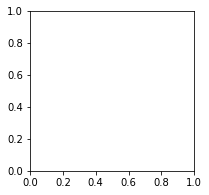

In [12]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize = (10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print("Recall metric in the testing dataset:", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
    
    # Plot non_normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes = class_names, title='Threshold >= %s'%i)

In [14]:
# 过采样
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
credit_cards = pd.read_csv('creditcard.csv')

columns=credit_cards.columns

features_columns = columns.delete(len(columns) - 1)

features=credit_cards[features_columns]
labels = credit_cards['Class']

In [17]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                           labels,
                                                                           test_size=0.2,
                                                                           random_state=0)

In [19]:
oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

In [20]:
len(os_labels[os_labels == 1])

227454

In [21]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

-------------
C parameter: 0.01

Iteration 1 :recall score = 0.890322580645
Iteration 2 :recall score = 0.894736842105
Iteration 3 :recall score = 0.968861347792
Iteration 4 :recall score = 0.957870324573
Iteration 5 :recall score = 0.958408898561

Mean recall score 0.934039998735

-------------
C parameter: 0.1



/anaconda2/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration 1 :recall score = 0.890322580645
Iteration 2 :recall score = 0.894736842105
Iteration 3 :recall score = 0.970167090849
Iteration 4 :recall score = 0.959914707466
Iteration 5 :recall score = 0.959969663996

Mean recall score 0.935022177012

-------------
C parameter: 1

Iteration 1 :recall score = 0.890322580645
Iteration 2 :recall score = 0.894736842105
Iteration 3 :recall score = 0.969436759987
Iteration 4 :recall score = 0.960288411866
Iteration 5 :recall score = 0.960244446643

Mean recall score 0.935005808249

-------------
C parameter: 10

Iteration 1 :recall score = 0.890322580645
Iteration 2 :recall score = 0.894736842105
Iteration 3 :recall score = 0.97065397809
Iteration 4 :recall score = 0.959914707466
Iteration 5 :recall score = 0.960958881525

Mean recall score 0.935317397966

-------------
C parameter: 100

Iteration 1 :recall score = 0.890322580645
Iteration 2 :recall score = 0.894736842105
Iteration 3 :recall score = 0.970454796946
Iteration 4 :recall score = 0